
y' = b0 + b1X1 + b2X2 + ..... + bnXn


y' = dependent varible
b = y-intercept
X = independent variable



Assumption of Linear Regression
1. Linearity - There should be linear Relationship between Y and each X
2. Homoscedasticity - Equal Variance - There shouldn't be any cone shape on the graph, i.e variance is dependent on independent variable.
3. MultiVariate Normality - Normality of error distribution
4. Independence - of observation - includes no auto-correlation, if pattern in the data shows that rows are not independent, example - stock market
5. Lack of Multicollinearity - Prdictors are not correlated with each other
6. The Outlier check - outlier shouldn't significantly effect the regression line


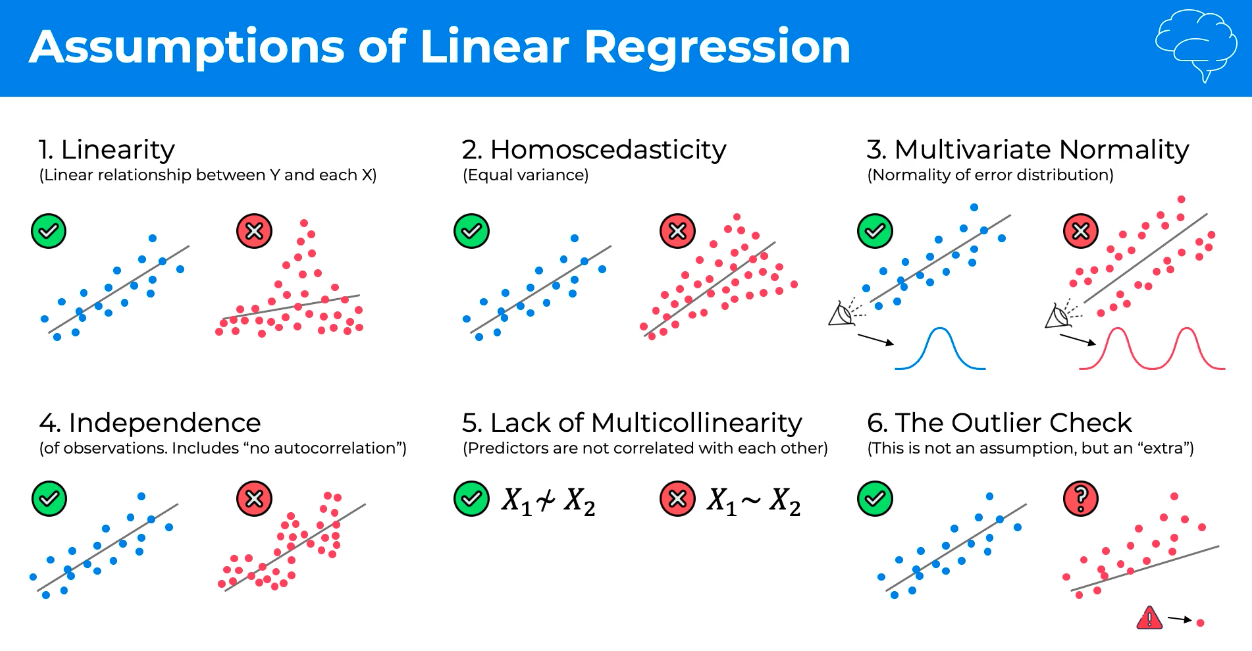

In [22]:
from IPython.display import Image
Image(filename='../Linear_Rgression_Assumption.png')




        => 5 Methods of building models:
        1. All-in
            a. When you have Prior Knowledge
            b. You have to - hard restriction to use
            c. Preparing for backward elimination

        2. Backward Elimination
            step 1 - select a significance level to stay in the model(eg sl = 0.05
            step 2 - fit the model with all possible predictors
            step 3 - consider the predictor with the highest P-value if P > SL, go to step 4, otherwise go to FIN
            step 4 - remove the predictor
            step 5 - Fit the model without this variable*, after this again go back to step 3
            FIN

        3. Forward Selection
            step 1 - select a significance level to stay in the model(eg sl = 0.05
            step 2 - fit all simple regression models y ~ xn select the one with the lowest P-value
            step 3 - Keep this variable and fit all the possible models with one extra predictor added to the ones you already have
            step 4 - consider the predictor with the lowest P-value if P < SL, go to step 3, otherwise go to FIN
            step 5 - FIN: Keep the previous model

            p < SL means column is important so keep the column

        4. Bidirectional Elimination
            step 1 : select a SL to enter and to stay in the model. eg SLENTER = 0.05, SLSTAY = 0.05
            step 2 : Perform the next step of forward selction, new variable must have P < SLENTER to enter
            step 3 : perform all steps of backward elimination, old variables must have P < SLSTAY to stay
            step 4 : no new variables can enter and no old variables can exit

        5. Score Comparison
            step 1 : select a criterion of goodness of fit(e.g Akaike criterion
            step 2 : Constuct all possible Regression models : 2^N - 1 total combinations
            step 3 : Select the one with the best criterion


        2-3-4 are stepwise regression


For converting catgorical attribute - State to numerical
we will create dummy variable, and always only one dummy variable, with 0 or 1
because say we have 2 states, and say D1 = newyork and D2 = california
then D1 = 1 - D2.

Importing Libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Dataset

In [26]:
dataset = pd.read_csv("50_Startups.csv")
X = dataset.iloc[ : , : -1].values
y = dataset.iloc[ : , -1].values

In [27]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [28]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


Encoding Independent Categorical Variable

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# 3 is the index of state column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Newyork    -> 0 0 1
# California -> 1 0 0
# Florida    -> 0 1 0

In [30]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

Splitting dataset into training and testing

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

Training the MultipleLinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting

In [35]:
y_pred = regressor.predict(X_test)

In [41]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


Bonus
1. predict single test case

In [45]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


2. print coefficients and intercept

In [46]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924854249
